<a href="https://colab.research.google.com/github/Vilmo18/computer_vision/blob/main/carre_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# Charger les données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Vérifier les dimensions des données
print('Dimensions des données d\'entraînement :', x_train.shape)
print('Dimensions des étiquettes d\'entraînement :', y_train.shape)
print('Dimensions des données de test :', x_test.shape)
print('Dimensions des étiquettes de test :', y_test.shape)


In [ ]:
# Sélectionner un indice d'image spécifique à visualiser
indice_image = 0  # Vous pouvez choisir n'importe quel indice ici

# Afficher l'image
plt.imshow(x_test[indice_image])
plt.axis('off')  # Masquer les axes
plt.title(f'Image CIFAR-10 : Classe {y_test[indice_image][0]}')
plt.show()

In [ ]:

# Charger les données CIFAR-10
(x_train, y_train), (_, _) = cifar10.load_data()

# Prétraitement des données
x_train = x_train.reshape((x_train.shape[0], -1))  # Aplatir les images
x_train = x_train.astype('float32') / 255.0  # Normalisation des pixels

np.random.seed(42)  # For reproducibility
indices = np.random.choice(range(x_train.shape[0]), size=10000, replace=False)
X_subset = x_train[indices]
y_subset = y_train[indices]


# Réduction des dimensions avec t-SNE
tsne = TSNE(n_components=2,  perplexity=15, n_iter=1500,random_state=42)
x_tsne = tsne.fit_transform(X_subset)

# Visualisation
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_subset, cmap='tab10', s=10)
plt.colorbar(label='Classe')
plt.title('Visualisation t-SNE des données CIFAR-10')
plt.xlabel('t-SNE composante 1')
plt.ylabel('t-SNE composante 2')
plt.show()


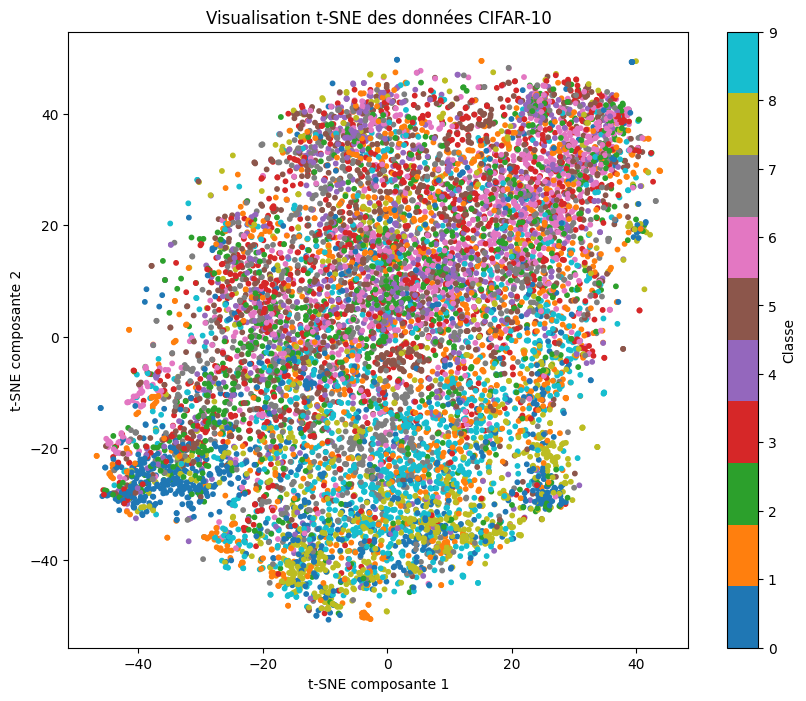

In [7]:
# Visualisation
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_subset, cmap='tab10', s=10)
plt.colorbar(label='Classe')
plt.title('Visualisation t-SNE des données CIFAR-10')
plt.xlabel('t-SNE composante 1')
plt.ylabel('t-SNE composante 2')
plt.show()
